## UCLA model trained on the UCLA dataset without visual attributes evaluation

In [1]:
import sys
sys.path.append("../../venv/lib/python3.6/site-packages/")
sys.path.append("..")

In [2]:
import os
import pandas as pd
from lib import analysis_utils as au
import matplotlib.pyplot as plt
import scipy
import numpy as np

/home/jesper/tmp/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Load the data

In [3]:
pred_dir = "models_preds"
# file_name = "UCLA_model_UCLA_dataset_without_visual_attributes_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300.csv"
file_name = 'UCLA_model_w_visual_attributes_no_protest_datalen-11646_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300.csv'
preds = pd.read_csv(os.path.join(pred_dir, file_name))
        
print ("loaded ", len(preds), " rows")

loaded  2329  rows


In [4]:
preds

,imageHASH,name,violence,sign,photo,fire,police,children,group_20,group_100,...,pred_photo,pred_fire,pred_police,pred_children,pred_group_20,pred_group_100,pred_flag,pred_night,pred_shouting,pred_violence
0,7630e8e8a2366464,test-01339.jpg,0.339361,1,0,0,0,0,1,0,...,0.014780,0.001398,0.061461,0.006879,0.759768,0.617912,0.034196,0.514248,0.270490,0.417868
1,98d8cc2a30e4c2c2,train-23444.jpg,0.267467,1,0,0,0,0,1,0,...,0.021752,0.004726,0.037615,0.007897,0.839600,0.128768,0.083850,0.047521,0.024964,0.301364
2,240d99f8e87b374c,train-21504.jpg,0.261983,1,0,0,0,0,1,0,...,0.008499,0.000770,0.002000,0.005089,0.457740,0.036066,0.009877,0.011252,0.002076,0.281906
3,d69272662b3d7cb6,test-04018.jpg,0.368959,1,1,0,0,0,1,0,...,0.034623,0.001309,0.002872,0.032346,0.990394,0.540333,0.060363,0.002141,0.031549,0.442501
4,9832a4e1f09abeac,train-14452.jpg,0.205163,1,0,0,0,1,1,0,...,0.016003,0.000398,0.005588,0.068277,0.866787,0.296275,0.019324,0.000177,0.015448,0.360911
5,f5bd5c54db929692,train-28689.jpg,0.350273,0,0,0,0,0,0,0,...,0.098426,0.001709,0.012465,0.026793,0.715908,0.061620,0.104596,0.002405,0.470900,0.385468
6,c9698b2b869e96ec,train-30511.jpg,0.322933,1,0,0,0,0,0,0,...,0.011706,0.005197,0.031706,0.038038,0.592178,0.021203,0.023088,0.011848,0.018349,0.309762
7,4c7cf4946e62e4e0,train-12885.jpg,0.206890,1,0,0,0,0,0,0,...,0.005616,0.000120,0.000381,0.013696,0.573573,0.025665,0.005175,0.007159,0.004470,0.169665
8,8d090d5d79b39296,test-06908.jpg,0.316481,1,0,0,0,0,1,0,...,0.008841,0.000263,0.000933,0.003364,0.883250,0.201286,0.007258,0.003531,0.001178,0.246228
9,a5a785c7ced6cfc7,train-23820.jpg,0.299302,1,0,0,0,0,0,0,...,0.025859,0.001802,0.008487,0.034589,0.705577,0.103410,0.042278,0.021361,0.072956,0.321797


### Protest

In [5]:
preds

,imageHASH,name,violence,sign,photo,fire,police,children,group_20,group_100,...,pred_photo,pred_fire,pred_police,pred_children,pred_group_20,pred_group_100,pred_flag,pred_night,pred_shouting,pred_violence
0,7630e8e8a2366464,test-01339.jpg,0.339361,1,0,0,0,0,1,0,...,0.014780,0.001398,0.061461,0.006879,0.759768,0.617912,0.034196,0.514248,0.270490,0.417868
1,98d8cc2a30e4c2c2,train-23444.jpg,0.267467,1,0,0,0,0,1,0,...,0.021752,0.004726,0.037615,0.007897,0.839600,0.128768,0.083850,0.047521,0.024964,0.301364
2,240d99f8e87b374c,train-21504.jpg,0.261983,1,0,0,0,0,1,0,...,0.008499,0.000770,0.002000,0.005089,0.457740,0.036066,0.009877,0.011252,0.002076,0.281906
3,d69272662b3d7cb6,test-04018.jpg,0.368959,1,1,0,0,0,1,0,...,0.034623,0.001309,0.002872,0.032346,0.990394,0.540333,0.060363,0.002141,0.031549,0.442501
4,9832a4e1f09abeac,train-14452.jpg,0.205163,1,0,0,0,1,1,0,...,0.016003,0.000398,0.005588,0.068277,0.866787,0.296275,0.019324,0.000177,0.015448,0.360911
5,f5bd5c54db929692,train-28689.jpg,0.350273,0,0,0,0,0,0,0,...,0.098426,0.001709,0.012465,0.026793,0.715908,0.061620,0.104596,0.002405,0.470900,0.385468
6,c9698b2b869e96ec,train-30511.jpg,0.322933,1,0,0,0,0,0,0,...,0.011706,0.005197,0.031706,0.038038,0.592178,0.021203,0.023088,0.011848,0.018349,0.309762
7,4c7cf4946e62e4e0,train-12885.jpg,0.206890,1,0,0,0,0,0,0,...,0.005616,0.000120,0.000381,0.013696,0.573573,0.025665,0.005175,0.007159,0.004470,0.169665
8,8d090d5d79b39296,test-06908.jpg,0.316481,1,0,0,0,0,1,0,...,0.008841,0.000263,0.000933,0.003364,0.883250,0.201286,0.007258,0.003531,0.001178,0.246228
9,a5a785c7ced6cfc7,train-23820.jpg,0.299302,1,0,0,0,0,0,0,...,0.025859,0.001802,0.008487,0.034589,0.705577,0.103410,0.042278,0.021361,0.072956,0.321797


sign


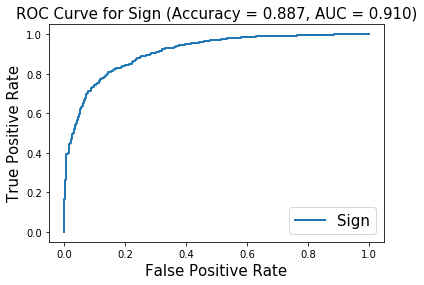

photo


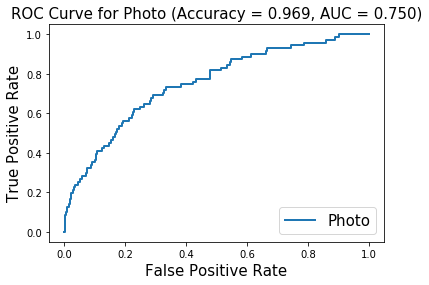

fire


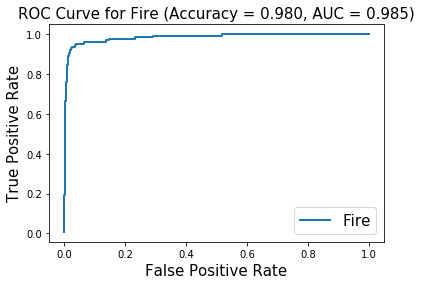

police


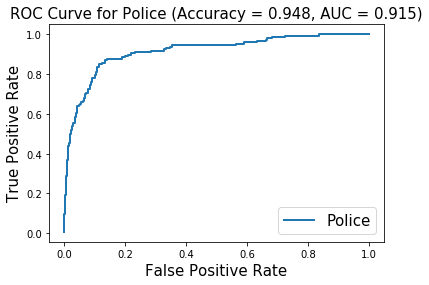

children


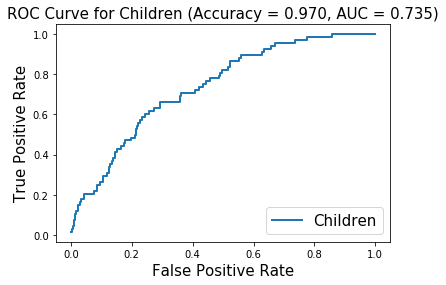

group_20


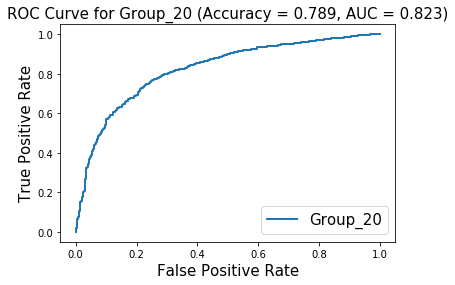

group_100


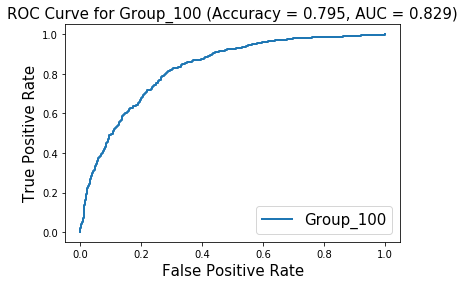

flag


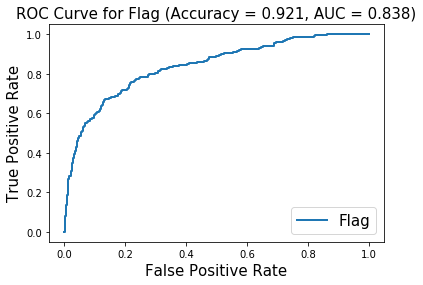

night


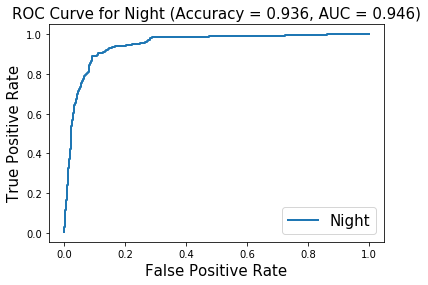

shouting


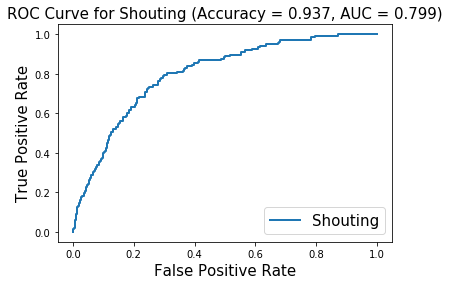

In [6]:
# preds_visual = preds[1][:len(test)]
tag_cols = ["sign", "photo", "fire", "police", "children", "group_20", "group_100", "flag", "night", "shouting"]
(preds[tag_cols].shape)
vis_preds = preds[tag_cols]
preds

# print(type(test_visual))
# for i in range(preds_visual.shape[1]): 
# for i in range(vis_preds.shape[1]):

for c in tag_cols:

    target = preds[c]
    pred = preds["pred_%s" % c]
    # remove masked values from test set
    target_non_masked = target[target!= -1]
    pred_non_masked = pred[target!= -1]
    
    print(c)
    try:
        au.plotROC(c, target_non_masked, pred_non_masked)
    except Exception as e:
        print(e)


### Violence

Text(0.5,1,'violence (Correlation = 0.894, R_squared = 0.799 )')

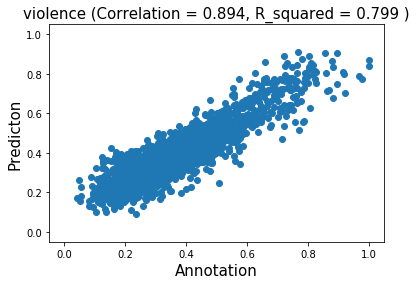

In [7]:

# remove masked values from test set
non_masked_violence_true = preds[preds["violence"] != - 1]["violence"]
non_masked_violence_preds = preds[preds["violence"] != - 1]["pred_violence"]

fig, ax = plt.subplots()
plt.scatter(non_masked_violence_true, non_masked_violence_preds, label = "violence")
plt.xlim([-.05,1.05])
plt.ylim([-.05,1.05])
plt.xlabel('Annotation', fontsize = 15)
plt.ylabel('Predicton', fontsize = 15)
corr, pval = scipy.stats.pearsonr(non_masked_violence_true, non_masked_violence_preds)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(non_masked_violence_true,non_masked_violence_preds)
r_squared = r_value ** 2
plt.title(('{attr} (Correlation = {corr:.3f}, R_squared = {r_2:.3f} )'
            .format(attr = "violence", corr= corr, r_2 = r_squared)), fontsize = 15)
